Data loaded successfully.
Processing data for subject_id: 17218341


C:\Users\rafsz\AppData\Local\Temp\ipykernel_16948\3760254531.py:83: MatplotlibDeprecationWarning: Passing label as a length 5 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(
C:\Users\rafsz\AppData\Local\Temp\ipykernel_16948\3760254531.py:83: MatplotlibDeprecationWarning: Passing label as a length 14 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(
C:\Users\rafsz\AppData\Local\Temp\ipykernel_16948\3760254531.py:83: MatplotlibDeprecationWarning: Passing label as a length 136 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(
C:\Users\rafsz\AppData\Local\Temp\ipykernel_16948\3760254531.py:83: Ma

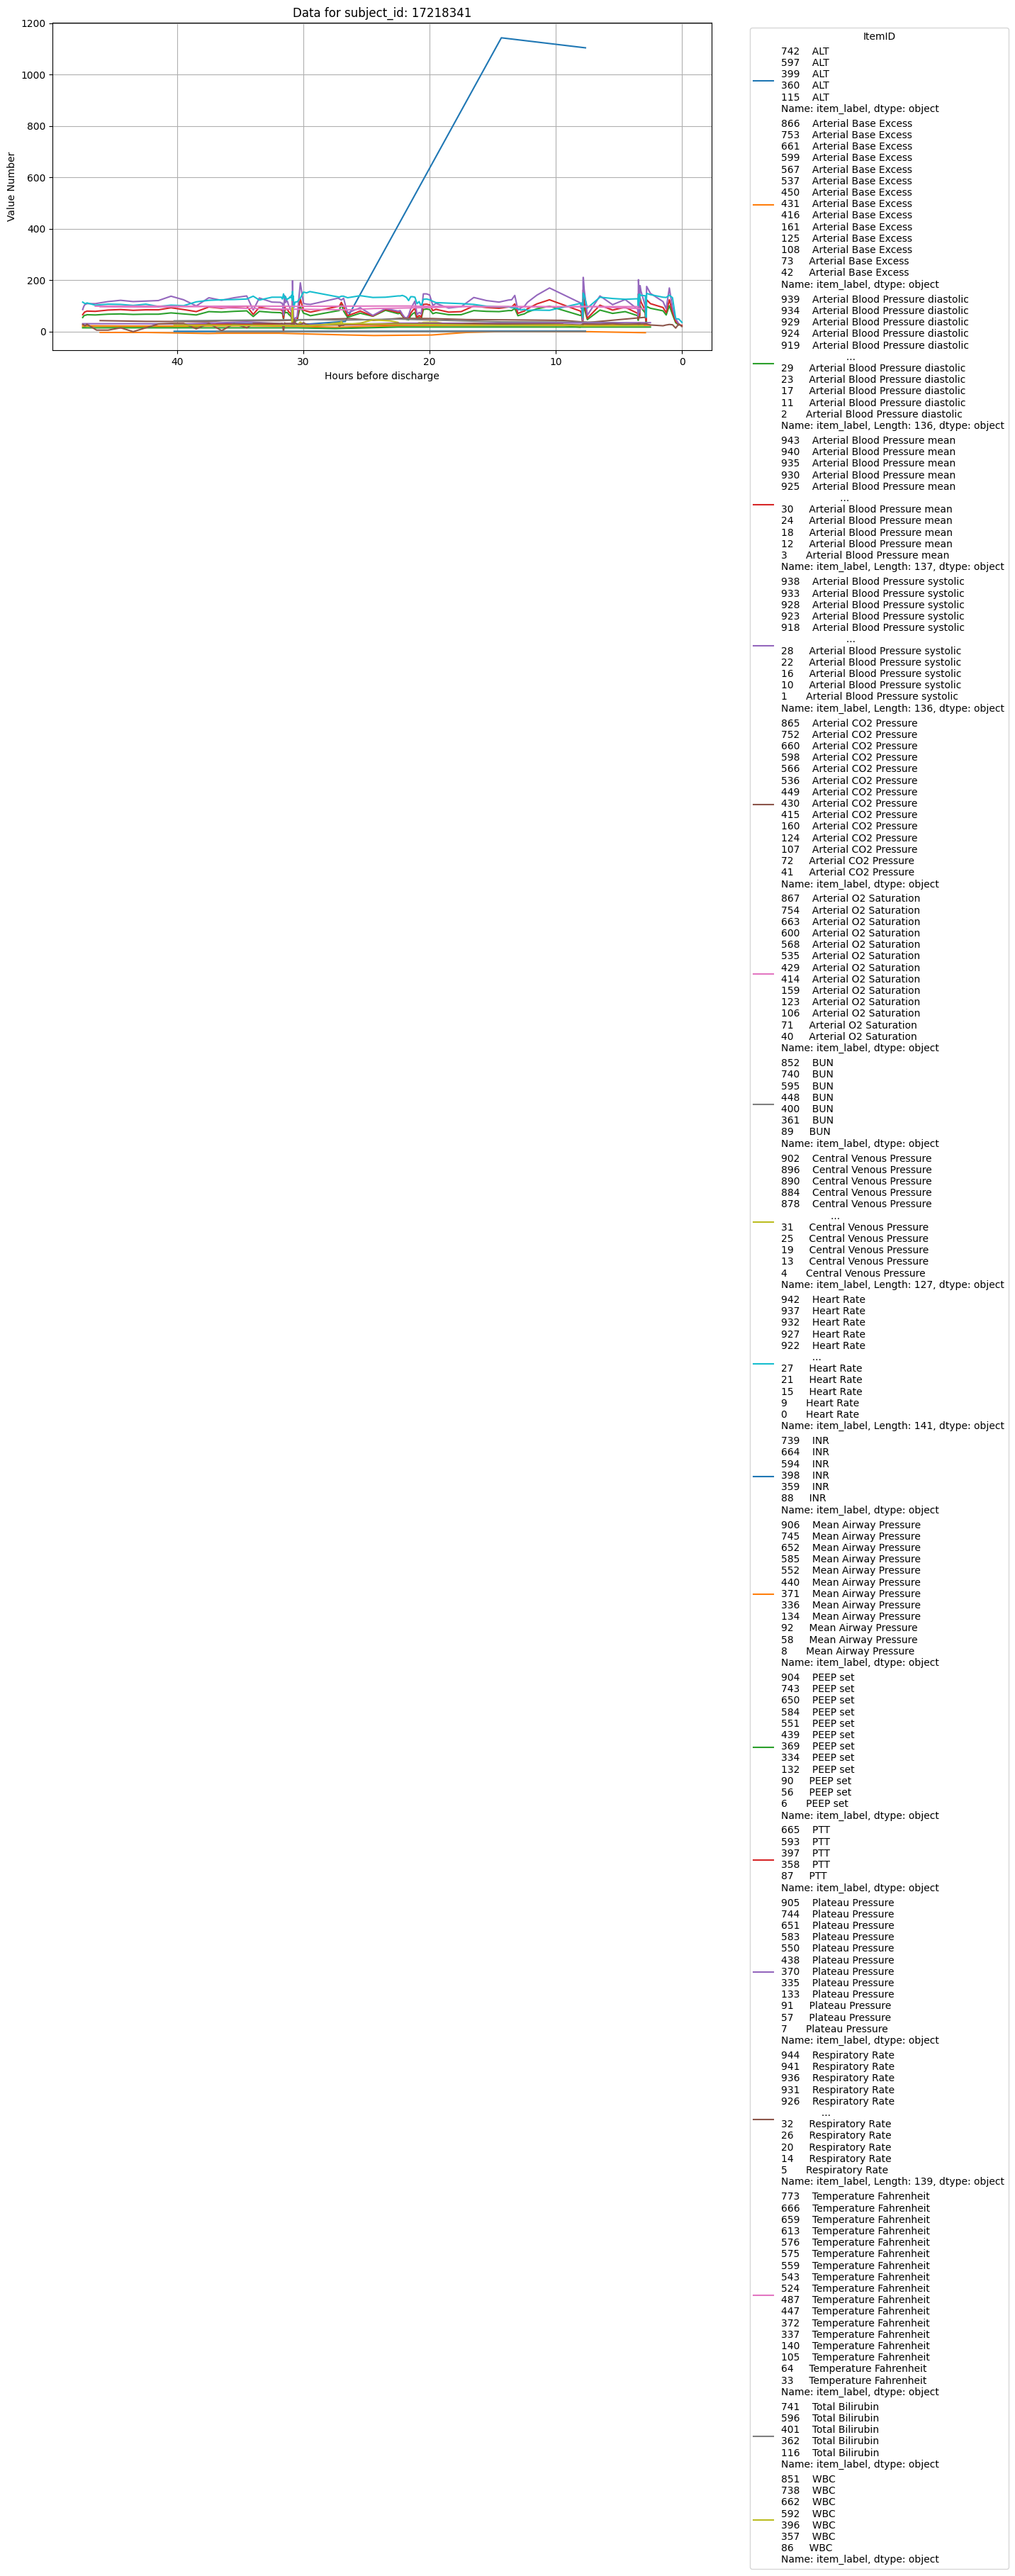

  subject_id   hadm_id   stay_id caregiver_id            charttime  \
0   17218341  27914462  32118180        39595  2113-04-01 19:00:00   
1   17218341  27914462  32118180        39595  2113-04-01 19:00:00   
2   17218341  27914462  32118180        39595  2113-04-01 19:00:00   
3   17218341  27914462  32118180        39595  2113-04-01 19:00:00   
4   17218341  27914462  32118180        39595  2113-04-01 19:00:00   

             storetime  itemid value  valuenum valueuom warning    chart_ts  \
0  2113-04-01 19:06:00  220045   115     115.0      bpm       0  4520530800   
1  2113-04-01 19:06:00  220050    86      86.0     mmHg       0  4520530800   
2  2113-04-01 19:06:00  220051    55      55.0     mmHg       0  4520530800   
3  2113-04-01 19:06:00  220052    66      66.0     mmHg       0  4520530800   
4  2113-04-01 19:06:00  220074    18      18.0     mmHg       0  4520530800   

   max_chart_ts  time_diff_hours                         item_label  
0    4520701800             47.5  

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
# This script loads patient data from parquet files in a specified folder
def load_all_patient_data(folder_path):
    """
    Load all patient data from parquet files in the specified folder.

    Parameters:
    folder_path (str): Path to the folder containing parquet files.

    Returns:
    pd.DataFrame: Combined DataFrame with data from all files.
    """
    all_data = []
    try:
        for filename in os.listdir(folder_path):
            if filename.endswith('.parquet'):
                file_path = os.path.join(folder_path, filename)
                df = pd.read_parquet(file_path)
                all_data.append(df)
        
        if all_data:
            combined_data = pd.concat(all_data, ignore_index=True)
            return combined_data
        else:
            print("No .parquet files found in the folder.")
            return None
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

if __name__ == "__main__":
    folder_path = './sample_patients'
    data = load_all_patient_data(folder_path)
    if data is not None:
        print("Data loaded successfully.")
        # print(data)
    else:
        print("Failed to load data.")
    for subject_id in data['subject_id'].unique():
        print(f"Processing data for subject_id: {subject_id}")
        subject_data = data[data['subject_id'] == subject_id]
        # plt.plot.figure(figsize=(10, 6))
        # Assuming you want to visualize or process the subject's data
        # For example, you could plot some data or perform analysis
        # Here we just print the subject's data for demonstration
        # print(subject_data)  # Display the data for the current subject_id
        # Example of processing: plotting a specific column with None values handled
        subject_data = subject_data.dropna(subset=['valuenum'])

        # If you want to visualize the data, you can use matplotlib or seaborn here
        # For example:
        # plt.plot((subject_data['max_chart_ts']-subject_data['chart_ts'])/3600,subject_data['valuenum'],'o')  # Replace 'some_column' with actual column name
        import matplotlib.pyplot as plt

        # Compute time difference in hours
        subject_data['time_diff_hours'] = (subject_data['max_chart_ts'] - subject_data['chart_ts']) / 3600
        subject_data['valuenum'] = pd.to_numeric(subject_data['valuenum'], errors='coerce')
        # Read d_items.csv to get item labels
        d_items_path = './full_tables/d_items.csv'
        items_df = pd.read_csv(d_items_path)

        # Ensure itemid columns have the same dtype before merging (avoid object vs int64 error)
        # Convert both to string to be safe (itemid values are numeric identifiers).
        items_df['itemid'] = items_df['itemid'].astype(str)
        subject_data['itemid'] = subject_data['itemid'].astype(str)

        # Merge itemid with corresponding label from items_df
        subject_data = subject_data.merge(items_df[['itemid','label']], how='left', on='itemid')
        subject_data.rename(columns={'label': 'item_label'}, inplace=True)
        

        
        # Create the plot
        plt.figure(figsize=(12, 6))

        # Group by itemid and plot each group
        for itemid, group in subject_data.groupby('itemid'):
            # Sort by time if not already sorted
            group = group.sort_values('time_diff_hours')
            
            plt.plot(
                group['time_diff_hours'],
                group['valuenum'],
                label=f'ItemID {itemid}'
            )

        plt.xlabel('Hours from chart time to max_chart_ts')
        plt.ylabel('ValueNum')
        plt.title('ValueNum vs Time (per ItemID)')
        plt.legend(title='ItemID', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.gca().invert_xaxis()

            
        
        # Plot using itemid as color 
        plt.xlabel('Hours before discharge')
        plt.ylabel('Value Number')
        plt.title(f"Data for subject_id: {subject_id}")
        # plt.show()
        plt.savefig(rf"./figures/subject_{subject_id}_data.png")
        plt.close()
    
        # Here you can add further processing for each subject's data
        print(subject_data.head())  # Display the first few rows of the subject's data


